In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df.groupby('sex',observed=False )['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [13]:
df.groupby('sex',observed=False )[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [17]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',observed=False,aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df.pivot_table(index='sex',columns=['day','time'],values='tip',aggfunc='sum',observed=False,margins=True)

day       Thur           Fri          Sat           Sun             All
time     Lunch Dinner  Lunch Dinner Lunch  Dinner Lunch  Dinner        
sex                                                                    
Male     89.41    0.0   5.70  21.23   0.0  181.95   0.0  186.78  485.07
Female   79.42    3.0  10.98  14.05   0.0   78.45   0.0   60.61  246.51
All     168.83    3.0  16.68  35.28   NaN  260.40   NaN  247.39  731.58

In [23]:
df = pd.read_csv('expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [25]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [27]:
df['date']= df.Date.dt.date
df['month_name']= df.Date.dt.month_name()
df['month']= df.Date.dt.month
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,date,month_name,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,2022-03-02,March,3
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,2022-03-02,March,3
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,2022-03-01,March,3
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,2022-03-01,March,3
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,2022-03-01,March,3


<Axes: xlabel='Category'>

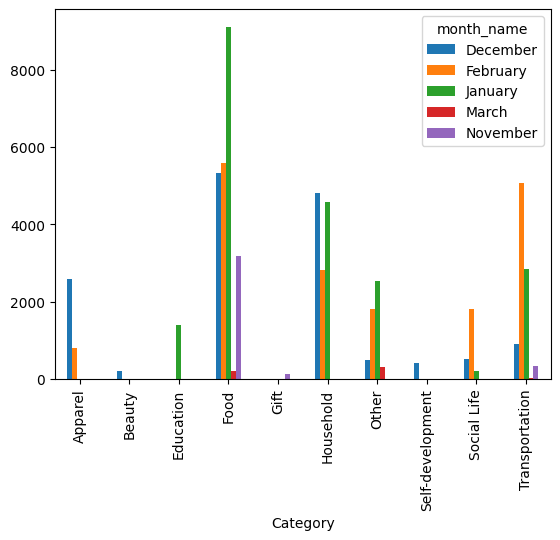

In [31]:
df[df['Income/Expense']=='Expense'].pivot_table(index='Category',
                                                columns='month_name',
                                                values='Amount',
                                                fill_value=0,
                                                aggfunc='sum').plot(kind='bar')

In [35]:
df.pivot_table(index='Income/Expense',
               columns='month_name',
               values='Amount',
               fill_value=0,
               aggfunc='sum')

month_name,December,February,January,March,November
Income/Expense,,,,,
Expense,15228.72,17864.65,20679.51,525.0,3620.4
Income,12310.00,18200.00,19641.00,600.0,4003.0


In [37]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
d= df['Name']

In [39]:
d

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [40]:
d.str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [41]:
d.str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [47]:
d[d.str.len() == d.str.len().max()]

307    Penasco y Castellana, Mrs. Victor de Satode (M...
Name: Name, dtype: object

In [46]:
d = d.str.strip()

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [74]:
df[['Title','FirstName']] = d.str.split(',').str.get(1).str.strip().str.split(' ',n=1,expand=True)
df['LastName']= d.str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry,Allen


In [77]:
df['Title'] = df['Title'].replace('Ms.','Miss.')
df['Title'] = df['Title'].replace('Mlle.','Miss.')


In [78]:
df.Title.value_counts()

Title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [81]:
df[df.FirstName.str.startswith('A')]['FirstName']

13            Anders Johan
22            Anna "Annie"
35         Alexander Oskar
38           Augusta Maria
61                  Amelie
              ...         
842                Augusta
845                Anthony
866               Asuncion
875    Adele Kiamie "Jane"
876          Alfred Ossian
Name: FirstName, Length: 95, dtype: object

In [84]:
df[df.FirstName.str.contains('john',case=False)][['FirstName']]

,FirstName
1,John Bradley (Florence Briggs Thayer)
41,William John Robert (Dorothy Ann Wonnacott)
45,William John
98,John T (Ada Julia Bone)
112,David John
117,William John Robert
160,John Hatfield
162,John Viktor
165,"Frank John William ""Frankie"""
168,John D


In [86]:
df[df.LastName.str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')][['LastName']]

,LastName
30,Uruchurtu
49,Arnold-Franchi
207,Albimona
210,Ali
353,Arnold-Franchi
493,Artagaveytia
518,Angle
784,Ali
840,Alhomaki


In [88]:
pd.Timestamp('2023/04/20')

Timestamp('2023-04-20 00:00:00')

In [89]:
import datetime as dt

In [94]:
d = pd.Timestamp(dt.datetime(2023,1,6,8,23,50))
d

Timestamp('2023-01-06 08:23:50')

In [95]:
d.year

2023

In [96]:
d.month

1

In [98]:
d.month_name()

'January'

In [100]:
d.date()

datetime.date(2023, 1, 6)

In [101]:
d.day

6

In [102]:
d.day_name()

'Friday'

In [108]:
pd.DatetimeIndex(['2023/1/1','2024/1/1','2025/1/1'])

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq=None)

In [109]:
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [110]:
pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

In [112]:
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1)])
pd.Series([1,2],index=dt_index)

2023-01-01    1
2022-01-01    2
dtype: int64

In [115]:
pd.date_range(start='2023/1/1',end='2025/1/1',periods=24)

DatetimeIndex([          '2023-01-01 00:00:00',
               '2023-02-01 18:46:57.391304348',
               '2023-03-05 13:33:54.782608696',
               '2023-04-06 08:20:52.173913044',
               '2023-05-08 03:07:49.565217392',
               '2023-06-08 21:54:46.956521740',
               '2023-07-10 16:41:44.347826088',
               '2023-08-11 11:28:41.739130436',
               '2023-09-12 06:15:39.130434784',
               '2023-10-14 01:02:36.521739132',
               '2023-11-14 19:49:33.913043480',
               '2023-12-16 14:36:31.304347828',
               '2024-01-17 09:23:28.695652176',
               '2024-02-18 04:10:26.086956524',
               '2024-03-20 22:57:23.478260872',
               '2024-04-21 17:44:20.869565216',
               '2024-05-23 12:31:18.260869568',
               '2024-06-24 07:18:15.652173920',
               '2024-07-26 02:05:13.043478264',
               '2024-08-26 20:52:10.434782608',
               '2024-09-27 15:39:07.8260

In [121]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='D')

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=732, freq='D')

In [122]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='B')

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-12-19', '2024-12-20', '2024-12-23', '2024-12-24',
               '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', length=523, freq='B')

In [124]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='W')

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05',
               ...
               '2024-10-27', '2024-11-03', '2024-11-10', '2024-11-17',
               '2024-11-24', '2024-12-01', '2024-12-08', '2024-12-15',
               '2024-12-22', '2024-12-29'],
              dtype='datetime64[ns]', length=105, freq='W-SUN')

In [127]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='6h')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 06:00:00',
               '2023-01-01 12:00:00', '2023-01-01 18:00:00',
               '2023-01-02 00:00:00', '2023-01-02 06:00:00',
               '2023-01-02 12:00:00', '2023-01-02 18:00:00',
               '2023-01-03 00:00:00', '2023-01-03 06:00:00',
               ...
               '2024-12-29 18:00:00', '2024-12-30 00:00:00',
               '2024-12-30 06:00:00', '2024-12-30 12:00:00',
               '2024-12-30 18:00:00', '2024-12-31 00:00:00',
               '2024-12-31 06:00:00', '2024-12-31 12:00:00',
               '2024-12-31 18:00:00', '2025-01-01 00:00:00'],
              dtype='datetime64[ns]', length=2925, freq='6h')

In [133]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='M')

C:\Users\mohsi\AppData\Local\Temp\ipykernel_21040\320054376.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2023/1/1',end='2025/1/1',freq='M')


DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [131]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='ME')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [135]:
pd.date_range(start='2023/1/1',end='2025/1/1',freq='YE')

DatetimeIndex(['2023-12-31', '2024-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [136]:
df= pd.read_csv('expense_data.csv')
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [138]:
df['Date'] = pd.to_datetime(df['Date'])

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [143]:
df.Date.dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int32

In [141]:
import matplotlib.pyplot as plt

In [144]:
df.columns

Index(['Date', 'Account', 'Category', 'Subcategory', 'Note', 'INR',
       'Income/Expense', 'Note.1', 'Amount', 'Currency', 'Account.1'],
      dtype='object')

In [146]:
df.groupby('Category')['INR'].sum()

Category
Allowance           14000.00
Apparel              3388.00
Beauty                196.00
Education            1400.00
Food                24502.48
Gift                  115.00
Household           12188.00
Other               37868.00
Petty cash              3.00
Salary               8000.00
Self-development      400.00
Social Life          2513.72
Transportation       9203.80
Name: INR, dtype: float64

In [151]:
df.Note.unique().size

160

In [156]:
pd.pivot_table(data = df,
               columns = ['Income/Expense'],
               index = 'Category',
               values='INR',
               fill_value=0,
               margins=True,
               aggfunc='sum')

Income/Expense,Expense,Income,All
Category,,,
Allowance,0.00,14000.0,14000.00
Apparel,3388.00,0.0,3388.00
Beauty,196.00,0.0,196.00
Education,1400.00,0.0,1400.00
Food,24502.48,0.0,24502.48
Gift,115.00,0.0,115.00
Household,12188.00,0.0,12188.00
Other,5117.00,32751.0,37868.00
Petty cash,0.00,3.0,3.00
